<a href="https://colab.research.google.com/github/MRazin172/2348534_ADA_Project/blob/main/ADA_Project_News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Personalized News Recommendation with MS MIND Dataset


Problem Statement: Digital news has made its presence over 40 years. Since online news websites make it easier for people to focus on certain topics and search for articles, delivering the right content to the right audience becomes crucial for publishers.

Dataset & Data Source:The dataset is called Microsoft News Dataset (MIND), a large-scale dataset for news recommendation research. The dataset was publicly released on ACL 2020, and was collected from anonymized behavior logs of Microsoft News website over a six-week period. This dataset provides a benchmark in an area that previously lacked high-quality datasets, thereby supporting subsequent research. The dataset contains over 160k English news articles and more than 15 million impression logs generated by 1 million users, and was pre-splitted into training and testing sets. In each set, there are 2 files(dataframes) that need to be considered: news(around 70 MB for train & test) and behavior(around 1.3 GB for train & test).

## Import

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import json

column_n = ['NewsId', 'Category', 'SubCat', 'Title', 'Abstract', 'url', 'TitleEnt', 'AbstractEnt']
column_b = ['ImpressionId', 'UserId', 'Time', 'History', 'Impressions']

# import the datasets
test_n_df = pd.read_csv('/content/testnews.tsv', sep='\t', header=None, names=column_n)
test_b_df = pd.read_csv('/content/behaviors.tsv', sep='\t', header=None, names=column_b)
train_n_df = pd.read_csv('/content/news.tsv', sep='\t', header=None, names=column_n)
train_b_df = pd.read_csv('/content/behaviors.tsv', sep='\t', header=None, names=column_b)


Check the information of the datasets.

In [ ]:
test_n_df.info()
test_n_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3026 entries, 0 to 3025
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   NewsId       3026 non-null   object
 1   Category     3026 non-null   object
 2   SubCat       3026 non-null   object
 3   Title        3026 non-null   object
 4   Abstract     2901 non-null   object
 5   TitleEnt     3025 non-null   object
 6   AbstractEnt  3024 non-null   object
dtypes: object(7)
memory usage: 165.6+ KB


(3026, 7)

In [ ]:
train_n_df.info()
train_n_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19092 entries, 0 to 19091
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   NewsId       19092 non-null  object
 1   Category     19091 non-null  object
 2   SubCat       19091 non-null  object
 3   Title        19091 non-null  object
 4   Abstract     18207 non-null  object
 5   TitleEnt     19090 non-null  object
 6   AbstractEnt  19089 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


(19092, 7)

In [ ]:
test_b_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25239 entries, 0 to 25238
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ImpressionId  25239 non-null  int64 
 1   UserId        25239 non-null  object
 2   Time          25239 non-null  object
 3   History       24733 non-null  object
 4   Impressions   25239 non-null  object
dtypes: int64(1), object(4)
memory usage: 986.0+ KB


In [ ]:
test_b_df1.columns

Index(['ImpressionId', 'UserId', 'Time', 'History'], dtype='object')

In [ ]:
train_b_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25239 entries, 0 to 25238
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ImpressionId  25239 non-null  int64 
 1   UserId        25239 non-null  object
 2   Time          25239 non-null  object
 3   History       24733 non-null  object
 4   Impressions   25239 non-null  object
dtypes: int64(1), object(4)
memory usage: 986.0+ KB


Now, let's have a preview of our data.

In [ ]:
test_n_df.head()

,NewsId,Category,SubCat,Title,Abstract,url,TitleEnt,AbstractEnt
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik..."
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://assets.msn.com/labs/mind/AACk2N6.html,[],"[{""Label"": ""National Basketball Association"", ..."
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://assets.msn.com/labs/mind/AAAKEkt.html,"[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI..."


In [ ]:
test_b_df.head()

,ImpressionId,UserId,Time,History,Impressions
0,1,U13740,11/11/2019 9:05:58 AM,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689-1 N35729-0
1,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...
2,3,U73700,11/14/2019 7:01:48 AM,N10732 N25792 N7563 N21087 N41087 N5445 N60384...,N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...
3,4,U34670,11/11/2019 5:28:05 AM,N45729 N2203 N871 N53880 N41375 N43142 N33013 ...,N35729-0 N33632-0 N49685-1 N27581-0
4,5,U8125,11/12/2019 4:11:21 PM,N10078 N56514 N14904 N33740,N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...


Check the unique values in the columns.

In [ ]:
test_b_df['UserId'].nunique()

18379

In [ ]:
print(test_n_df['Category'].unique(), test_n_df['SubCat'].nunique())
print(train_n_df['Category'].unique(), train_n_df['SubCat'].nunique())


['lifestyle' 'health' 'news' 'sports' 'weather' 'entertainment' 'autos'
 'travel' 'foodanddrink' 'tv' 'finance' 'movies' 'video' 'music' 'kids'] 159
['lifestyle' 'health' 'news' 'sports' 'weather' 'entertainment' 'autos'
 'travel' 'foodanddrink' 'tv' 'finance' 'movies' 'video' 'music' 'kids'
 'middleeast' nan] 222


In [ ]:
duplicates = train_b_df.duplicated()
has = duplicates.any()
print(has)

False


## Cleaning

### Drop URL & Impression

Drop the columns that we will not use in our analysis.

In [ ]:
test_n_df = test_n_df.drop('url', axis=1)
train_n_df = train_n_df.drop('url', axis=1)


In [ ]:
test_b_df1 = test_b_df.drop('Impressions', axis=1)
train_b_df1 = train_b_df.drop('Impressions', axis=1)

test_b_df1

,ImpressionId,UserId,Time,History
0,1,U13740,11/11/2019 9:05:58 AM,N55189 N42782 N34694 N45794 N18445 N63302 N104...
1,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...
2,3,U73700,11/14/2019 7:01:48 AM,N10732 N25792 N7563 N21087 N41087 N5445 N60384...
3,4,U34670,11/11/2019 5:28:05 AM,N45729 N2203 N871 N53880 N41375 N43142 N33013 ...
4,5,U8125,11/12/2019 4:11:21 PM,N10078 N56514 N14904 N33740
...,...,...,...,...
25234,25235,U57642,11/13/2019 11:27:58 AM,N27448 N15761 N15159 N62714 N52551 N22260 N490...
25235,25236,U14685,11/11/2019 2:52:13 PM,N19381 N1445 N719 N56753 N43142 N21317
25236,25237,U63839,11/9/2019 6:05:09 AM,N17587 N27782 N60879 N8748 N17953 N2994 N26242...
25237,25238,U22849,11/10/2019 6:19:58 AM,N32372 N58227 N32483 N18663 N42299 N363 N64408...


### Take Sample

Since we have a very large dataset, take a sample on users to study their behaviors.

In [ ]:
unique_users = test_b_df1['UserId'].unique()
sampled_users = pd.Series(unique_users).sample(frac=0.01, random_state=42)
sampled_test = test_b_df1[test_b_df1['UserId'].isin(sampled_users)]

sampled_test

,ImpressionId,UserId,Time,History
57,58,U61875,11/11/2019 9:51:04 PM,N61070 N5034 N63620 N20216 N80 N46392 N5013 N3...
217,218,U19958,11/13/2019 5:57:01 PM,N29499 N19638 N14167 N16251 N56170 N64661 N350...
273,274,U50993,11/11/2019 12:09:48 AM,N54359 N55846 N55189 N47485 N6233 N119 N37331 ...
322,323,U35764,11/14/2019 1:39:17 PM,N29177 N33713 N4020 N5886 N45269 N20575 N18106
326,327,U93438,11/14/2019 7:19:08 AM,N61221 N61018 N43132 N46392 N3542 N38923 N2899...
...,...,...,...,...
24665,24666,U61828,11/12/2019 11:13:22 AM,N36699 N10865 N12950 N15655 N3560 N5462 N63054...
24979,24980,U71999,11/13/2019 7:22:12 PM,N54512 N27526 N14761 N57399 N32482 N20114 N224...
25151,25152,U18669,11/12/2019 12:14:54 PM,N31224 N44399 N40716 N47289 N54959 N9124 N5969...
25216,25217,U5319,11/11/2019 6:05:04 AM,N56596 N21164 N64631 N11804 N22976 N60212 N825...


In [ ]:
print(sampled_test['UserId'].nunique(), test_b_df1['UserId'].nunique())

184 18379


### Split History

To better understand the user behaviors, we explode the 'History' column.

In [ ]:
# Split the column then explode
sampled_test['History'] = sampled_test['History'].str.split(' ')
exploded_test = sampled_test.explode('History')

<ipython-input-27-d3cd0ffb25fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_test['History'] = sampled_test['History'].str.split(' ')


In [ ]:
exploded_test.info()
exploded_test.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7368 entries, 57 to 25235
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ImpressionId  7368 non-null   int64 
 1   UserId        7368 non-null   object
 2   Time          7368 non-null   object
 3   History       7364 non-null   object
dtypes: int64(1), object(3)
memory usage: 287.8+ KB


,ImpressionId,UserId,Time,History
57,58,U61875,11/11/2019 9:51:04 PM,N61070
57,58,U61875,11/11/2019 9:51:04 PM,N5034
57,58,U61875,11/11/2019 9:51:04 PM,N63620
57,58,U61875,11/11/2019 9:51:04 PM,N20216
57,58,U61875,11/11/2019 9:51:04 PM,N80


# EDA

## Time Analysis

To understand at what time the users would like to read news the most, we add a column of 'Time_of_Day' by splitting time into four time frames, and study the user behaviors.

In [ ]:
# Transform the column to datetime
sampled_test['Time'] = pd.to_datetime(sampled_test['Time'])

# Assign each time a time of day
def assign_time_of_day(hour):
    if 6 <= hour <= 11:
        return 'morning'
    elif 12 <= hour <= 17:
        return 'afternoon'
    elif 18 <= hour <= 23:
        return 'evening'
    else:
        return 'night'

sampled_test['Time_of_Day'] = sampled_test['Time'].dt.hour.apply(lambda x: assign_time_of_day(x))

<ipython-input-30-9bcf492fc333>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sampled_test['Time'] = pd.to_datetime(sampled_test['Time'])
<ipython-input-30-9bcf492fc333>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_test['Time'] = pd.to_datetime(sampled_test['Time'])
<ipython-input-30-9bcf492fc333>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_

In [ ]:
sampled_test.head()

,ImpressionId,UserId,Time,History,Time_of_Day
57,58,U61875,2019-11-11 21:51:04,"[N61070, N5034, N63620, N20216, N80, N46392, N...",evening
217,218,U19958,2019-11-13 17:57:01,"[N29499, N19638, N14167, N16251, N56170, N6466...",afternoon
273,274,U50993,2019-11-11 00:09:48,"[N54359, N55846, N55189, N47485, N6233, N119, ...",night
322,323,U35764,2019-11-14 13:39:17,"[N29177, N33713, N4020, N5886, N45269, N20575,...",afternoon
326,327,U93438,2019-11-14 07:19:08,"[N61221, N61018, N43132, N46392, N3542, N38923...",morning


In [ ]:
# Count the value of each time frame
sampled_test['Time_of_Day'].value_counts()

,count
Time_of_Day,
morning,115
afternoon,83
night,33
evening,21


In [ ]:
# Check the time range of the dataset
earliest = sampled_test['Time'].min()
latest = sampled_test['Time'].max()
print(earliest, latest)

2019-11-09 02:08:08 2019-11-14 19:34:23


In [ ]:
# Calculate the time proportion
sampled_test['Time_of_Day'].value_counts() / len(sampled_test)

,count
Time_of_Day,
morning,0.456349
afternoon,0.329365
night,0.130952
evening,0.083333


To visualize the time the users like to read news the most, we can draw a seaborn plot.

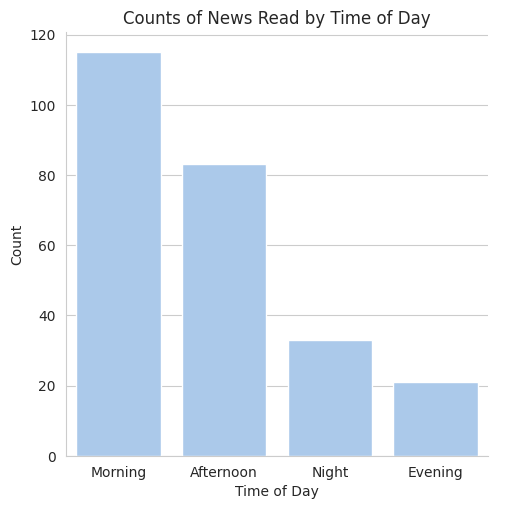

In [ ]:
# Visualize using seaborn
sns.set_style('whitegrid')
sns.set_palette('pastel')

time = sampled_test.copy()
time['Time_of_Day'] = time['Time_of_Day'].replace({'morning': 'Morning', 'afternoon': 'Afternoon', 'evening': 'Evening', 'night': 'Night'})
T = sns.catplot(x="Time_of_Day", kind="count", data=time, order=time['Time_of_Day'].value_counts().index, height=5, aspect=1)

for ay in T.axes.flat:
    ay.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

T.set(title='Counts of News Read by Time of Day', xlabel='Time of Day', ylabel='Count')
plt.show()

## Popular Entities

To understand what entities are the most popular among all the news we have in the dataset, we will clean the 'TitleEnt' column to look into the frequency of each entity.

In [ ]:
# Create a new column of Labels
def extract_labels(row):
    try:
        if pd.notnull(row) and isinstance(row, str):
            objects = json.loads(row)
            labels = [obj['Label'].replace(" ", "_").replace(",", "_") for obj in objects]
            return labels
        else:
            return []
    except Exception as e:
        return []

test_n_df['Labels'] = test_n_df['TitleEnt'].apply(extract_labels)
test_n_df.head()

,NewsId,Category,SubCat,Title,Abstract,TitleEnt,AbstractEnt,Labels
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...","[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[],"[Prince_Philip__Duke_of_Edinburgh, Charles__Pr..."
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...",[Adipose_tissue]
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId...",[]
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",[],"[{""Label"": ""National Basketball Association"", ...",[]
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...",[Skin_tag]


In [ ]:
test_n_df1 = test_n_df.explode('Labels')
test_n_df1

,NewsId,Category,SubCat,Title,Abstract,TitleEnt,AbstractEnt,Labels
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...","[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[],Prince_Philip__Duke_of_Edinburgh
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...","[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[],Charles__Prince_of_Wales
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...","[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[],Elizabeth_II
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...",Adipose_tissue
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId...",NaN
...,...,...,...,...,...,...,...,...
3022,N12111,news,newsus,Another credit card skimmer found on a Tarrant...,Another credit card skimmer has been found at ...,"[{""Label"": ""Tarrant County, Texas"", ""Type"": ""G...","[{""Label"": ""Texas Department of Agriculture"", ...",Tarrant_County__Texas
3023,N3945,health,weightloss,A Diabetes Diagnosis Sparked Him to Start Runn...,"Now, Brandt Westberg's headaches and backaches...",[],[],NaN
3024,N3495,health,wellness,If You Always Wake up Right Before Your Alarm ...,You have an internal clock that keeps track of...,"[{""Label"": ""If You"", ""Type"": ""W"", ""WikidataId""...",[],If_You
3024,N3495,health,wellness,If You Always Wake up Right Before Your Alarm ...,You have an internal clock that keeps track of...,"[{""Label"": ""If You"", ""Type"": ""W"", ""WikidataId""...",[],Models_of_scientific_inquiry


In [ ]:
count_labels = test_n_df1['Labels'].value_counts()
n = 20
top_labels = count_labels.head(n)
print(top_labels)

Labels
Donald_Trump                        89
United_States                       30
New_England_Patriots                29
National_Football_League            25
Washington_Nationals                24
World_Series                        21
Houston_Astros                      18
California                          18
Meghan__Duchess_of_Sussex           16
Halloween                           15
Cleveland_Browns                    15
China                               15
Florida                             15
Detroit_Lions                       13
Democratic_Party_(United_States)    13
Philadelphia_Eagles                 12
Texas                               12
Dallas_Cowboys                      12
Syria                               12
Tiger_Woods                         11
Name: count, dtype: int64


From the above, we can see that Donald Trump is the most frequenly appeared entity, almost 3 folds of the second popular entity, National Football League. Following these two, are New England Patriorts, Houston Astros and United States.

## Popular News Category

To understand what news category is the most popular, let's check how many news each category contains in our dataset.

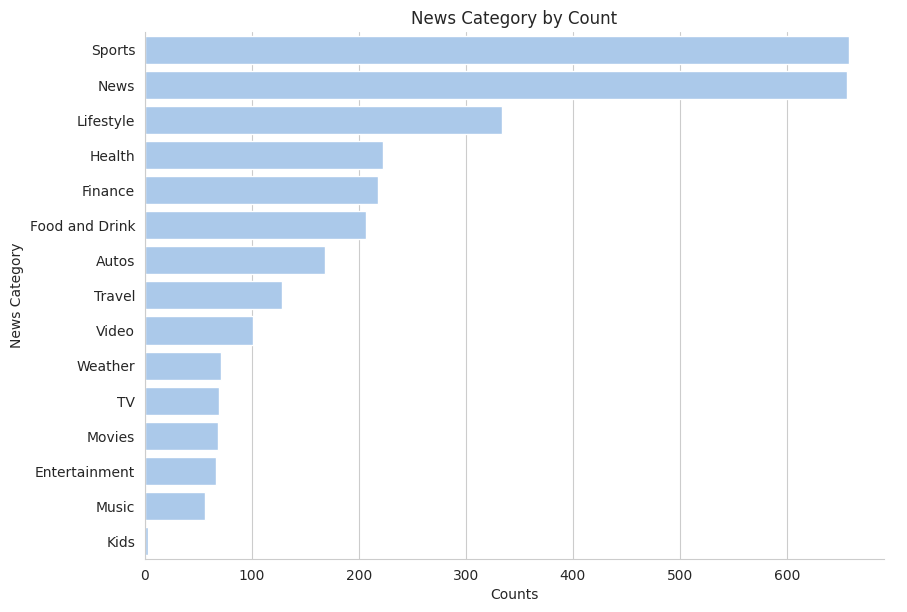

In [ ]:
# Get a new dataframe for category and rename the columns
cat = test_n_df.copy()
cat['Category'] = cat['Category'].replace({
    'sports': 'Sports','news': 'News', 'finance': 'Finance', 'travel': 'Travel', 'video': 'Video', 'lifestyle': 'Lifestyle', 'foodanddrink': 'Food and Drink',
    'weather': 'Weather', 'autos': 'Autos', 'health': 'Health', 'music': 'Music', 'tv': 'TV', 'entertainment': 'Entertainment', 'movies': 'Movies',
    'kids': 'Kids', 'middleeast': 'Middle East', 'games': 'Games', 'northamerica': 'North America'})

# Graph the count of each category
cat_plot = sns.catplot(y='Category', kind='count', data=cat, order=cat['Category'].value_counts().index, height=6, aspect=1.5)

cat_plot.set(title='News Category by Count', xlabel='Counts', ylabel='News Category')
plt.show()

It seems like most of the categories our dataset contains is Sports and News, exceeding 35,000. On the other hand, we do not have much Kids, Middle East, Games, and North America categories.

To explore what topics make Sports such a big category, let's take a look into Sports's subcategories.

In [ ]:
cat_sports = cat[cat['Category'] == 'Sports']
cat_sports['SubCat'].value_counts().head(5)

,count
SubCat,
football_nfl,261
baseball_mlb,86
football_ncaa,70
basketball_nba,59
more_sports,36


In the Sports category, football_nfl is the most popular subcategory, aligning with the most frequent entity we just discovered.

Then, to understand what categories the users like to read, we check the categories in each user's history, and count what category appears the most frequently.

In [ ]:
# Merge two datasets to link each News ID to title
cat_hist = pd.merge(exploded_test, test_n_df, left_on = 'History', right_on = 'NewsId', how = 'left')

# Create the new dataframe
cat_hist = cat_hist[['ImpressionId', 'UserId', 'History', 'Category', 'SubCat', 'Title']]
cat_hist.head()

,ImpressionId,UserId,History,Category,SubCat,Title
0,58,U61875,N61070,NaN,NaN,NaN
1,58,U61875,N5034,NaN,NaN,NaN
2,58,U61875,N63620,NaN,NaN,NaN
3,58,U61875,N20216,NaN,NaN,NaN
4,58,U61875,N80,NaN,NaN,NaN


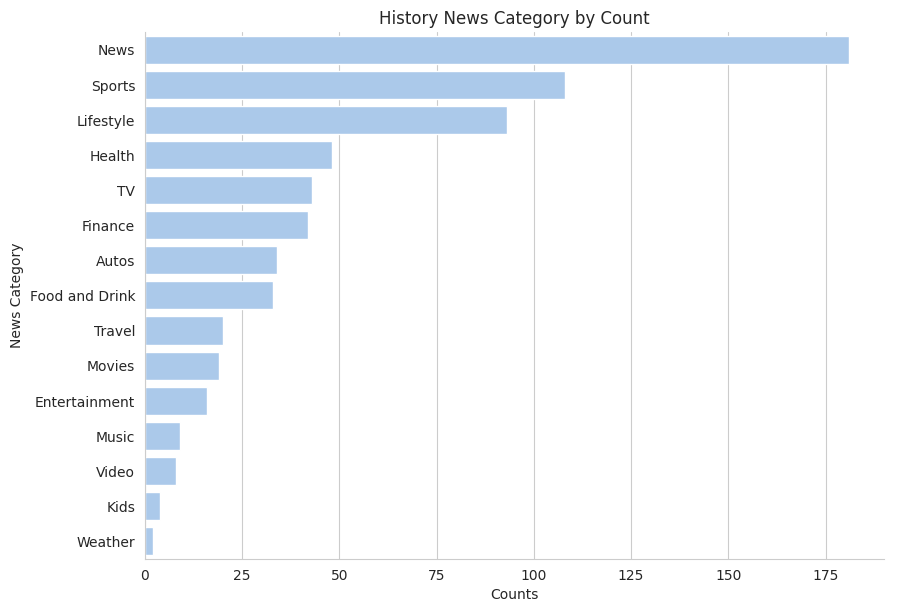

In [ ]:
# Rename the columns
cat_hist['Category'] = cat_hist['Category'].replace({
    'sports': 'Sports','news': 'News', 'finance': 'Finance', 'travel': 'Travel', 'video': 'Video', 'lifestyle': 'Lifestyle', 'foodanddrink': 'Food and Drink',
    'weather': 'Weather', 'autos': 'Autos', 'health': 'Health', 'music': 'Music', 'tv': 'TV', 'entertainment': 'Entertainment', 'movies': 'Movies',
    'kids': 'Kids', 'middleeast': 'Middle East', 'games': 'Games', 'northamerica': 'North America'})

# Plot the count of news in history
hist_plot = sns.catplot(y='Category', kind='count', data=cat_hist, order=cat_hist['Category'].value_counts().index, height=6, aspect=1.5)

hist_plot.set(title='History News Category by Count', xlabel='Counts', ylabel='News Category')
plt.show()

It seems like among the users we have in the sample, News is the most popular category that they would like to read. Following are Sorts, Lifestyle, Finance, and TV. Middle East, Kids, and Games have almost no count because we do not have much of them in the dataset. North America even disappear from the graph.

# TF-IDF

To perform clustering, we may first transform our text into vectors by combining the news dataset and behavior dataset and applying the TF-IDF measure.

In [ ]:
# Merging news and behavior datasets

test_n_df['NewsId'] = test_n_df['NewsId'].astype(str)
exploded_test['History'] = exploded_test['History'].astype(str)

merged_df = pd.merge(test_n_df, exploded_test, left_on='NewsId', right_on='History')

print(merged_df.shape)
print(merged_df.head())

(660, 12)
   NewsId Category     SubCat  \
0  N53526   health     voices   
1  N53526   health     voices   
2  N53526   health     voices   
3   N9721   health  nutrition   
4   N9721   health  nutrition   

                                               Title  \
0  I Was An NBA Wife. Here's How It Affected My M...   
1  I Was An NBA Wife. Here's How It Affected My M...   
2  I Was An NBA Wife. Here's How It Affected My M...   
3  50 Foods You Should Never Eat, According to He...   
4  50 Foods You Should Never Eat, According to He...   

                                            Abstract TitleEnt  \
0  I felt like I was a fraud, and being an NBA wi...       []   
1  I felt like I was a fraud, and being an NBA wi...       []   
2  I felt like I was a fraud, and being an NBA wi...       []   
3                             This is so depressing.       []   
4                             This is so depressing.       []   

                                         AbstractEnt Labels  Im

To transform what we have into vectors, we may take a smaller sample.

In [ ]:
sampled_df = merged_df.sample(frac=0.01, random_state = 42)
print(sampled_df.shape)
print(sampled_df.head())

(7, 12)
     NewsId   Category     SubCat  \
629  N16251     health    medical   
499  N16199  lifestyle     causes   
135  N13861       kids        fun   
480   N4607      autos  autosnews   
90    N5978    finance    markets   

                                                 Title  \
629  6 Silent Symptoms of Colon Cancer You Might Be...   
499  1 Family's Adoption Photo Shoot Is on Point, b...   
135    Why Americans Use Fahrenheit Instead of Celsius   
480  Cause determined in Jessi Combs' fatal speed r...   
90   Eric Tse, 24, just became a billionaire overnight   

                                              Abstract  \
629  Nearly 140,000 people are diagnosed with color...   
499  When Keia Jones-Baldwin married her husband, R...   
135  Why is there more than one system of measuring...   
480                    Occurred at speeds near 550 mph   
90   A 24-year-old business school graduate has jus...   

                                              TitleEnt  \
629  [{"Label

In [ ]:
sampled_df.head()

,NewsId,Category,SubCat,Title,Abstract,TitleEnt,AbstractEnt,Labels,ImpressionId,UserId,Time,History
629,N16251,health,medical,6 Silent Symptoms of Colon Cancer You Might Be...,"Nearly 140,000 people are diagnosed with color...","[{""Label"": ""Colorectal cancer"", ""Type"": ""C"", ""...",[],[Colorectal_cancer],22849,U85311,11/11/2019 11:18:39 AM,N16251
499,N16199,lifestyle,causes,"1 Family's Adoption Photo Shoot Is on Point, b...","When Keia Jones-Baldwin married her husband, R...","[{""Label"": ""Photo shoot"", ""Type"": ""C"", ""Wikida...",[],[Photo_shoot],9717,U18283,11/11/2019 1:22:47 PM,N16199
135,N13861,kids,fun,Why Americans Use Fahrenheit Instead of Celsius,Why is there more than one system of measuring...,"[{""Label"": ""Celsius"", ""Type"": ""U"", ""WikidataId...","[{""Label"": ""United States"", ""Type"": ""G"", ""Wiki...",[Celsius],11822,U8557,11/10/2019 11:11:54 AM,N13861
480,N4607,autos,autosnews,Cause determined in Jessi Combs' fatal speed r...,Occurred at speeds near 550 mph,"[{""Label"": ""Jessi Combs"", ""Type"": ""P"", ""Wikida...",[],[Jessi_Combs],11822,U8557,11/10/2019 11:11:54 AM,N4607
90,N5978,finance,markets,"Eric Tse, 24, just became a billionaire overnight",A 24-year-old business school graduate has jus...,[],[],[],9180,U73691,11/11/2019 1:21:44 PM,N5978


In [ ]:
# Removal of Entity(for titles)
import nltk
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk.corpus import stopwords
from nltk.tree import Tree
import string

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('stopwords')

def remove_entities(tokens):
    tags = pos_tag(tokens)
    tree = ne_chunk(tags)
    return [leaf[0] for leaf in tree if type(leaf) != Tree]

tokenized_news = [word_tokenize(t) for t in sampled_df['Title'].str.lower()]

tokenized_news = [[word for word in tokens if word not in string.punctuation] for tokens in tokenized_news]

stop_words = set(stopwords.words('english'))
tokenized_news = [[word for word in tokens if word not in stop_words] for tokens in tokenized_news]

tokenized_news = [remove_entities(tokens) for tokens in tokenized_news]

# Transform the list of words back to a Dataframe
processed_news = [' '.join(tokens) for tokens in tokenized_news]
#processed_news_column = pd.DataFrame(processed_news, columns=['Processed_Text'])
# or
sampled_df['Processed_Title'] = processed_news

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## TF-IDF min max document threshold

In [ ]:
# Perform the TF-IDF measure
from sklearn.feature_extraction.text import TfidfVectorizer

# Min & Max document threshold， n-grams should be performed here
tfidf = TfidfVectorizer(stop_words='english', min_df=0.001, max_df=0.999, ngram_range=(1, 3))
text_vectors = tfidf.fit_transform(sampled_df['Title'])

In [ ]:
print(tfidf.vocabulary_)

{'silent': 83, 'symptoms': 94, 'colon': 26, 'cancer': 17, 'missing': 65, 'silent symptoms': 84, 'symptoms colon': 95, 'colon cancer': 27, 'cancer missing': 18, 'silent symptoms colon': 85, 'symptoms colon cancer': 96, 'colon cancer missing': 28, 'family': 42, 'adoption': 6, 'photo': 69, 'shoot': 80, 'point': 72, 'touching': 100, 'story': 93, 'family adoption': 43, 'adoption photo': 7, 'photo shoot': 70, 'shoot point': 81, 'point touching': 73, 'touching story': 101, 'family adoption photo': 44, 'adoption photo shoot': 8, 'photo shoot point': 71, 'shoot point touching': 82, 'point touching story': 74, 'americans': 9, 'use': 105, 'fahrenheit': 39, 'instead': 51, 'celsius': 22, 'americans use': 10, 'use fahrenheit': 106, 'fahrenheit instead': 40, 'instead celsius': 52, 'americans use fahrenheit': 11, 'use fahrenheit instead': 107, 'fahrenheit instead celsius': 41, 'cause': 19, 'determined': 33, 'jessi': 53, 'combs': 29, 'fatal': 45, 'speed': 89, 'record': 75, 'crash': 32, 'cause determine

In [ ]:
print(text_vectors)

  (0, 28)	0.28867513459481287
  (0, 96)	0.28867513459481287
  (0, 85)	0.28867513459481287
  (0, 18)	0.28867513459481287
  (0, 27)	0.28867513459481287
  (0, 95)	0.28867513459481287
  (0, 84)	0.28867513459481287
  (0, 65)	0.28867513459481287
  (0, 17)	0.28867513459481287
  (0, 26)	0.28867513459481287
  (0, 94)	0.28867513459481287
  (0, 83)	0.28867513459481287
  (1, 74)	0.23570226039551578
  (1, 82)	0.23570226039551578
  (1, 71)	0.23570226039551578
  (1, 8)	0.23570226039551578
  (1, 44)	0.23570226039551578
  (1, 101)	0.23570226039551578
  (1, 73)	0.23570226039551578
  (1, 81)	0.23570226039551578
  (1, 70)	0.23570226039551578
  (1, 7)	0.23570226039551578
  (1, 43)	0.23570226039551578
  (1, 93)	0.23570226039551578
  (1, 100)	0.23570226039551578
  :	:
  (5, 87)	0.28867513459481287
  (5, 13)	0.28867513459481287
  (5, 92)	0.28867513459481287
  (5, 24)	0.28867513459481287
  (5, 77)	0.28867513459481287
  (5, 86)	0.28867513459481287
  (5, 12)	0.28867513459481287
  (6, 50)	0.23570226039551578
  (6

In [ ]:
text_vectors.shape

(7, 108)

# Stemming and Lemmatization

To find meaning in news titles, we implemented stemming and lemmatization to reduce words into their root form for more effective vectorization. We stored the tokenized titles in the stemm_lemm_titles object for downstream tasks.

In [ ]:
!pip install nltk
import nltk
nltk.download('wordnet')
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def process_text(text):
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token.lower() not in stop_words]
    stemmed_and_lemmatized_tokens = [lemmatizer.lemmatize(stemmer.stem(token)) for token in tokens]
    return stemmed_and_lemmatized_tokens

stemm_lemm_titles = []
for title in sampled_df['Processed_Title']:
    stemmed_and_lemmatized_tokens = process_text(title)
    stemm_lemm_titles.append(' '.join(stemmed_and_lemmatized_tokens))

[nltk_data] Downloading package wordnet to /root/nltk_data...


# Word Embedding with Word2vec

To conduct visualization with t-SNE, we first vectorized the stemmed and lemmatized titles using word embeddings. We chose this technique to preserve more meaning in addition to semantic relationships.

In [ ]:
import gensim
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity

w2v = Word2Vec(stemm_lemm_titles, sg=1, negative=5, vector_size=100, window=8, min_count=5, workers=4)

word_vectors = w2v.wv

# Create a DataFrame to store word vectors
word_vectors_df = pd.DataFrame(word_vectors.vectors, index=word_vectors.index_to_key)

# Rename columns
word_vectors_df.columns = [f"vector_{i+1}" for i in range(w2v.vector_size)]
word_vectors_df

,vector_1,vector_2,vector_3,vector_4,vector_5,vector_6,vector_7,vector_8,vector_9,vector_10,...,vector_91,vector_92,vector_93,vector_94,vector_95,vector_96,vector_97,vector_98,vector_99,vector_100
,-0.004293,0.006301,0.009678,0.010553,-0.009883,-0.014005,0.010155,0.023342,-0.011596,-0.011749,...,0.005090,0.004413,0.008434,-0.002358,0.021908,0.008236,-0.004046,-0.010242,0.005098,0.010925
e,-0.010578,0.006765,0.007449,0.006790,0.007286,-0.009688,0.003006,0.013274,-0.006273,-0.010214,...,0.002749,0.000616,0.004886,-0.009166,0.003565,0.004330,0.007695,-0.004067,-0.007393,0.006885
i,-0.001706,0.005663,-0.004716,-0.000790,0.007500,0.004323,-0.002066,0.009275,-0.011033,0.002629,...,-0.003087,0.007601,0.011533,-0.005425,0.013403,0.006869,0.008274,-0.000860,0.010108,-0.004752
t,-0.010016,0.012041,0.002051,-0.001338,0.004550,-0.007280,0.004708,0.013934,0.003123,-0.011349,...,-0.005815,0.000849,0.001703,-0.003977,0.015521,0.000967,0.008552,-0.008747,-0.000457,-0.002954
s,-0.008485,0.003733,-0.005089,-0.001517,0.003626,0.002975,0.003031,0.008083,-0.006740,0.003600,...,0.004702,-0.003206,0.007449,-0.005309,0.007798,-0.006850,0.008260,0.003264,0.002247,0.005183
a,-0.009686,0.003791,0.000402,-0.008916,-0.009584,-0.003306,0.005600,0.007470,-0.008247,-0.009167,...,0.010101,0.009895,-0.006981,-0.003676,0.013136,0.005789,-0.000228,-0.009669,0.003919,-0.005463
o,0.006625,-0.002009,0.001095,0.001677,-0.000152,-0.001713,0.007813,0.006154,-0.005831,-0.005118,...,-0.001115,0.001978,-0.001217,-0.001690,0.004423,0.002060,0.010417,-0.007127,-0.000068,0.007891
r,0.005932,-0.000845,0.011877,0.009570,-0.004488,-0.003947,0.006665,0.004656,-0.009385,-0.011390,...,0.003876,-0.001476,-0.005158,0.004778,0.005367,0.001276,0.001149,-0.006201,0.006651,-0.001249
c,-0.011240,0.011398,0.006087,0.009916,0.006506,0.000102,0.011289,0.001557,-0.009686,0.000944,...,-0.003666,0.002922,0.004962,-0.002788,0.014860,0.009759,0.004768,0.005782,0.007648,-0.003622
h,-0.006413,-0.004651,-0.006165,0.008494,-0.001826,-0.008996,-0.002861,0.010189,-0.004874,-0.006407,...,-0.007794,0.009940,0.005958,0.006361,0.013769,-0.006243,-0.006813,0.005026,0.010854,0.005301


# Clustering


Then, to have a overview of our data, we may perform the K-Means clustering based on the vectors we just generated to see how our data is distributed.

In [ ]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import plotly.express as px

## Text-Vectors

In [ ]:
# Use PCA to reduce dimension to 2
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)

pca_vecs = pca.fit_transform(text_vectors.toarray())

x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [ ]:
from sklearn.exceptions import NotFittedError

opt_ks = range(2, 10)
sil_scores = []

for k in opt_ks:
    try:
        kmeans = KMeans(n_clusters=k, n_init=10)
        kmeans.fit(pca_vecs)
        labels = kmeans.labels_
        if len(set(labels)) > 1:  # Ensure more than one cluster
            silhouette_avg = silhouette_score(pca_vecs, labels)
            sil_scores.append(silhouette_avg)
            print(f"For n_clusters = {k}, The average silhouette_score is : {silhouette_avg}")
        else:
            print(f"Skipping k={k} due to insufficient clusters")
    except ValueError as e:
        print(f"ValueError for k={k}: {e}")
    except NotFittedError as e:
        print(f"NotFittedError for k={k}: {e}")



For n_clusters = 2, The average silhouette_score is : 0.3787213354787791
For n_clusters = 3, The average silhouette_score is : 0.3984321752726953
For n_clusters = 4, The average silhouette_score is : 0.28252187221743724
For n_clusters = 5, The average silhouette_score is : 0.3161105878305827
For n_clusters = 6, The average silhouette_score is : 0.17944969232103522
ValueError for k=7: Number of labels is 7. Valid values are 2 to n_samples - 1 (inclusive)
ValueError for k=8: n_samples=7 should be >= n_clusters=8.
ValueError for k=9: n_samples=7 should be >= n_clusters=9.


To conduct sensitivity analysis with hyperparameter tuning, we used the average silhouette score to find the optimal k for k-means clustering. We chose k = 5, since the silhouette score sees a significant drop at k = 6. In addition, for the context of our news corpus, we aim for defining more number of clusters to inspect the different characteristics of these segments.

In [ ]:
# Performs K-Means clustering with K = 4
k = 4
kmeans = KMeans(n_clusters = k, random_state = 42)
kmeans.fit(text_vectors)
cluster_labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
text_vectors_df = pd.DataFrame(text_vectors)

text_vectors_df['cluster'] = cluster_labels
text_vectors_df['x0'] = pca_vecs[:, 0]
text_vectors_df['x1'] = pca_vecs[:, 1]

In [ ]:
feature_names = tfidf.get_feature_names_out()

In [ ]:
df = pd.DataFrame(text_vectors.todense(), columns=feature_names)
df['cluster'] = cluster_labels
df_grouped = df.groupby('cluster').mean()

def get_top_keywords(n_terms, text_vectors, feature_names, cluster_labels):
    for i, row in df_grouped.iterrows():
        print('\nCluster {}'.format(i))
        print(', '.join([feature_names[t] for t in np.argsort(row)[-n_terms:]]))  # Make sure to use np.argsort(row)

get_top_keywords(10, text_vectors, feature_names, cluster_labels)


Cluster 0
billionaire overnight, just, just billionaire, just billionaire overnight, overnight, eric, eric tse, billionaire, eric tse 24, 24

Cluster 1
silent, silent symptoms, silent symptoms colon, symptoms colon cancer, symptoms colon, symptoms, cancer, colon, missing, colon cancer

Cluster 2
use, use fahrenheit, americans, americans use, americans use fahrenheit, celsius, fahrenheit instead, fahrenheit, fahrenheit instead celsius, use fahrenheit instead

Cluster 3
state, average social security, social security check, social security, social, security check, security, check, average, security check state


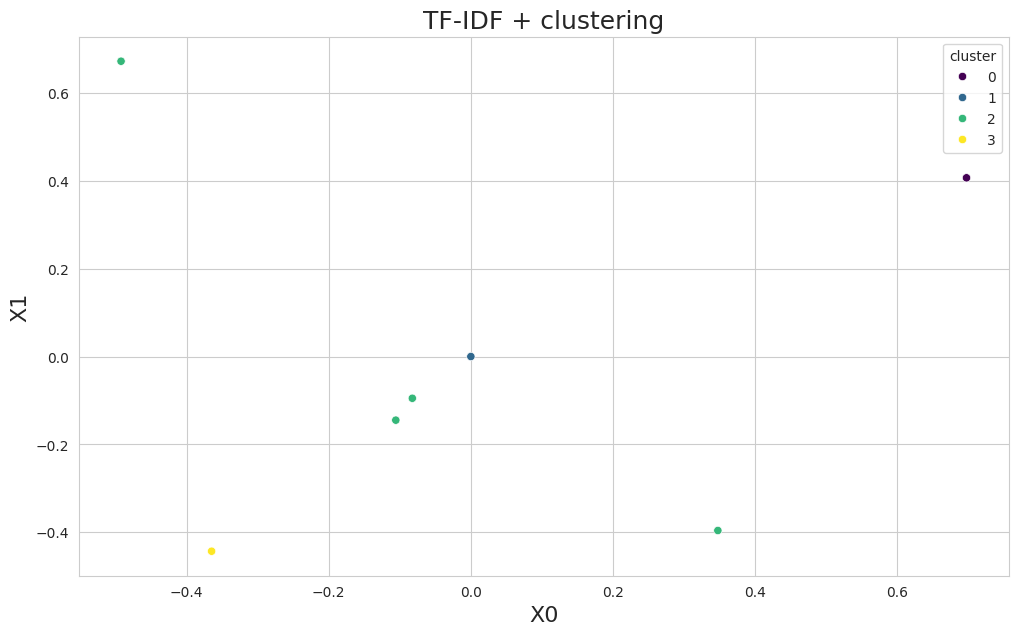

In [ ]:
# Plot out the clustering result
import matplotlib.pyplot as plt
import seaborn as sns

text_vectors_df = text_vectors_df.reset_index()

plt.figure(figsize=(12, 7))
plt.title("TF-IDF + clustering", fontdict={"fontsize": 18})
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
sns.scatterplot(data=text_vectors_df, x='x0', y='x1', hue='cluster', palette='viridis')

plt.show()

## Word Cloud

To visualize the frequent words from the clusters, we also generated word clouds.

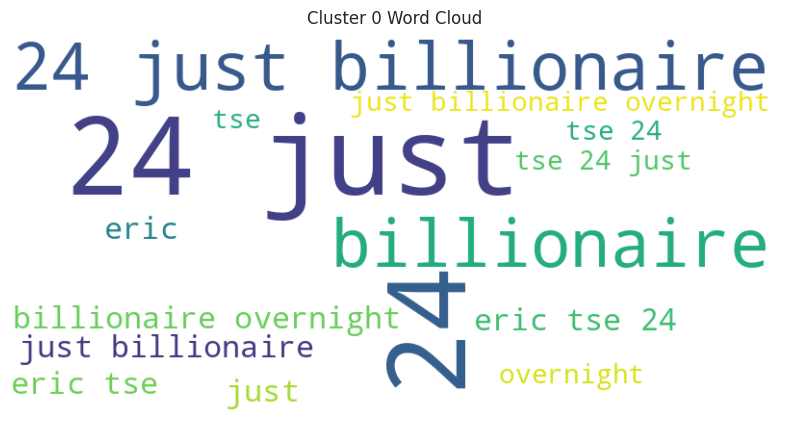

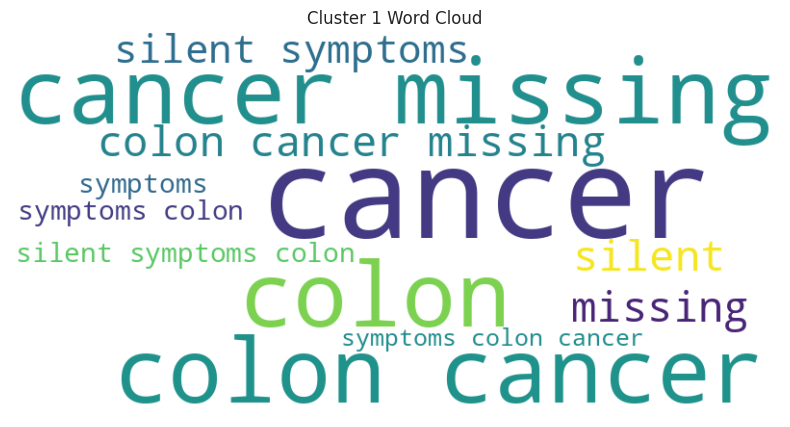

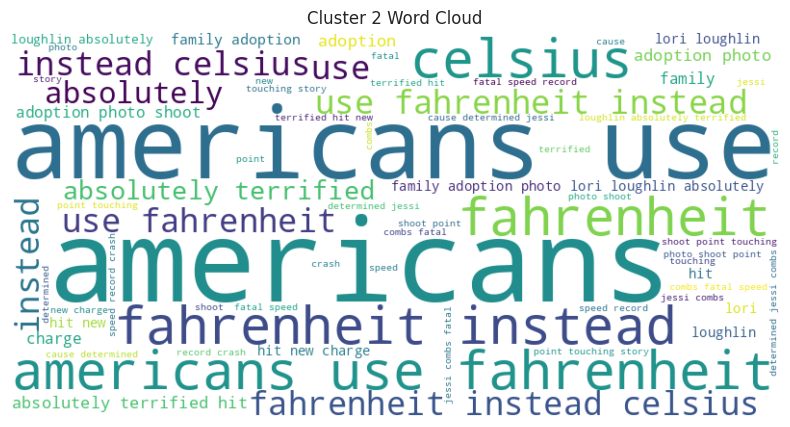

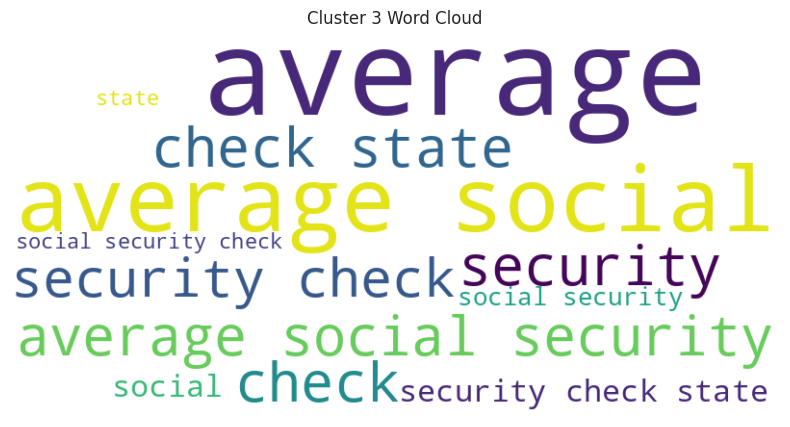

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

word_freqs = {}
for i, feature_name in enumerate(feature_names):
    word_freqs[feature_name] = df.iloc[:, i].sum()

for cluster_id in range(4):
    # filter df based on kmeans clusters
    cluster_df = df[df['cluster'] == cluster_id]
    # dictionary of feature names and TF-IDF scores
    cluster_word_freqs = {}
    for i, feature_name in enumerate(feature_names):
        cluster_word_freqs[feature_name] = cluster_df.iloc[:, i].sum()
    # weights = word frequencies
    wc = WordCloud(width=800, height=400, background_color='white', colormap='viridis')
    wc.generate_from_frequencies(cluster_word_freqs)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'Cluster {cluster_id} Word Cloud')
    plt.axis('off')
    plt.show()

# TSNE

In [ ]:
# Use PCA to reduce dimension to 2
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)

pca_vecs = pca.fit_transform(word_vectors_df)

x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

For n_clusters = 2 The average silhouette_score is : 0.27030122
For n_clusters = 3 The average silhouette_score is : 0.33102632
For n_clusters = 4 The average silhouette_score is : 0.37011254
For n_clusters = 5 The average silhouette_score is : 0.34420824
For n_clusters = 6 The average silhouette_score is : 0.3278069
For n_clusters = 7 The average silhouette_score is : 0.32272562
For n_clusters = 8 The average silhouette_score is : 0.322489
For n_clusters = 9 The average silhouette_score is : 0.3583493


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'Evaluating optimal k')

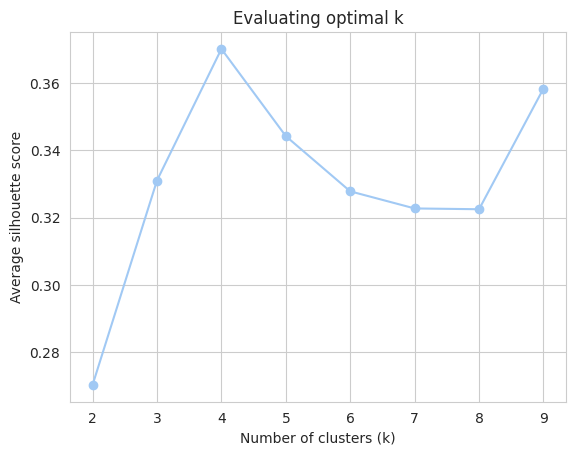

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples

opt_ks = range(2, 10)
sil_scores = []

# iterating through ks and list out avg silhouette_score
for k in opt_ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_vecs)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(pca_vecs, labels)
    sil_scores.append(silhouette_avg)
    print("For n_clusters =", k, "The average silhouette_score is :", silhouette_avg)

plt.plot(opt_ks, sil_scores, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average silhouette score')
plt.title('Evaluating optimal k')

In [ ]:
# Performs K-Means clustering with K = 3
k = 3
kmeans = KMeans(n_clusters = k, random_state = 42)
kmeans.fit(word_vectors_df)
cluster_labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
word_vectors_df['cluster'] = cluster_labels
word_vectors_df['x0'] = pca_vecs[:, 0]
word_vectors_df['x1'] = pca_vecs[:, 1]

In [ ]:
feature_names = tfidf.get_feature_names_out()

In [ ]:
#df = pd.DataFrame(text_vectors.todense(), columns=feature_names)
df = word_vectors_df
df['cluster'] = cluster_labels
df_grouped = df.groupby('cluster').mean()

def get_top_keywords(n_terms, word_vectors_df, feature_names, cluster_labels):
    for i, row in df_grouped.iterrows():
        print('\nCluster {}'.format(i))
        print(', '.join([feature_names[t] for t in np.argsort(row)[-n_terms:]]))  # Make sure to use np.argsort(row)

get_top_keywords(10, word_vectors_df, feature_names, cluster_labels)


Cluster 0
symptoms colon cancer, colon cancer, terrified hit, new charge, missing, celsius, adoption photo, photo shoot point, loughlin, symptoms

Cluster 1
eric, 24 just billionaire, lori, celsius, new charge, record crash, photo shoot point, touching story, adoption photo, touching

Cluster 2
cause determined, point touching, shoot point touching, symptoms, just, adoption photo, celsius, social, billionaire overnight, 24 just


In [ ]:
word_vectors_df = word_vectors_df.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Check if there are any NaN values after conversion
if word_vectors_df.isnull().any().any():
    # Handle NaN values. Here, we replace NaN with 0
    word_vectors_df = word_vectors_df.fillna(0)


In [ ]:
from sklearn.manifold import TSNE

# Check number of samples
num_samples = word_vectors_df.shape[0]

# Set perplexity to a value less than the number of samples
perplexity_value = min(num_samples - 1, 40)  # Use a default value or adjust as needed

tsne_model = TSNE(perplexity=perplexity_value, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(word_vectors_df)

x = new_values[:, 0]
y = new_values[:, 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


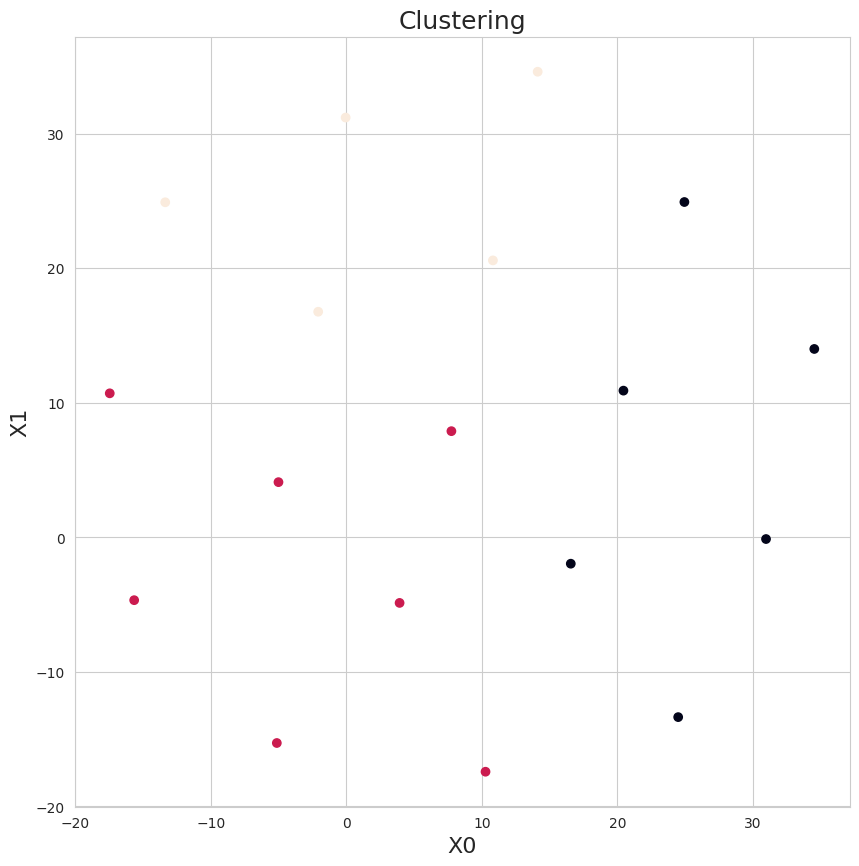

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(new_values)
labels = kmeans.labels_

plt.figure(figsize=(10, 10))
plt.scatter(x, y, c=labels)
plt.title("Clustering", fontdict={"fontsize": 18})
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
plt.show()

# DBSCAN


In [ ]:
text_vectors_df = pd.DataFrame(text_vectors)

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.cluster import DBSCAN
from scipy.sparse import coo_matrix

dbscan = DBSCAN(eps=1, min_samples=2)
dbscan.fit(word_vectors_df)

DBSCAN(eps=1, min_samples=2)

In [ ]:
cluster_labels = dbscan.labels_
coords = word_vectors_df
no_clusters = len(np.unique(cluster_labels) )
no_noise = np.sum(np.array(cluster_labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 3
Estimated no. of noise points: 0


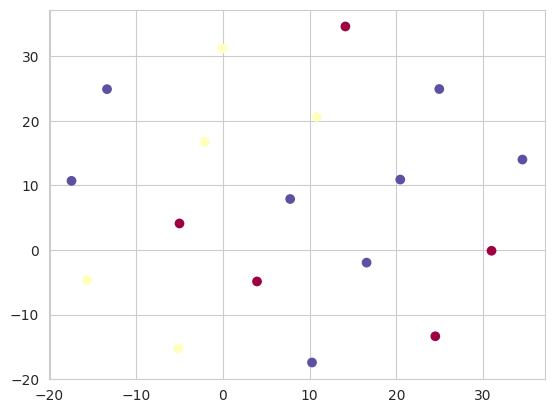

In [ ]:
unique_labels = set(cluster_labels)

colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

cluster_colors = {label: color for label, color in zip(unique_labels, colors)}

point_colors = [cluster_colors[label] for label in cluster_labels]

plt.scatter(x, y, c=point_colors, marker='o')
plt.show()

# Sentiment Analysis

To understand the sentiment of the news that viewed by the users, we may be able to discover what kind of news may be more widespreaded or what kind of news the publishers would like to write. We may use two approaches to understand the sentiment.

First, tokenize the titles and filter out the stop words.

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

# Create a new dataframe and clean it for tokenization
sent = sampled_df.copy()
sent["text_prcessed"] = sent["Title"].str.lower()
sent["text_prcessed"] = sent["text_prcessed"].replace('<br />', ' ', regex=True)
sent["text_prcessed"] = sent["text_prcessed"].replace('[^\w\d\s]', ' ', regex=True)
sent.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,NewsId,Category,SubCat,Title,Abstract,TitleEnt,AbstractEnt,Labels,ImpressionId,UserId,Time,History,Processed_Title,text_prcessed
629,N16251,health,medical,6 Silent Symptoms of Colon Cancer You Might Be...,"Nearly 140,000 people are diagnosed with color...","[{""Label"": ""Colorectal cancer"", ""Type"": ""C"", ""...",[],[Colorectal_cancer],22849,U85311,11/11/2019 11:18:39 AM,N16251,6 silent symptoms colon cancer might missing,6 silent symptoms of colon cancer you might be...
499,N16199,lifestyle,causes,"1 Family's Adoption Photo Shoot Is on Point, b...","When Keia Jones-Baldwin married her husband, R...","[{""Label"": ""Photo shoot"", ""Type"": ""C"", ""Wikida...",[],[Photo_shoot],9717,U18283,11/11/2019 1:22:47 PM,N16199,1 family 's adoption photo shoot point touchin...,1 family s adoption photo shoot is on point b...
135,N13861,kids,fun,Why Americans Use Fahrenheit Instead of Celsius,Why is there more than one system of measuring...,"[{""Label"": ""Celsius"", ""Type"": ""U"", ""WikidataId...","[{""Label"": ""United States"", ""Type"": ""G"", ""Wiki...",[Celsius],11822,U8557,11/10/2019 11:11:54 AM,N13861,americans use fahrenheit instead celsius,why americans use fahrenheit instead of celsius
480,N4607,autos,autosnews,Cause determined in Jessi Combs' fatal speed r...,Occurred at speeds near 550 mph,"[{""Label"": ""Jessi Combs"", ""Type"": ""P"", ""Wikida...",[],[Jessi_Combs],11822,U8557,11/10/2019 11:11:54 AM,N4607,cause determined jessi combs fatal speed recor...,cause determined in jessi combs fatal speed r...
90,N5978,finance,markets,"Eric Tse, 24, just became a billionaire overnight",A 24-year-old business school graduate has jus...,[],[],[],9180,U73691,11/11/2019 1:21:44 PM,N5978,eric tse 24 became billionaire overnight,eric tse 24 just became a billionaire overnight


In [ ]:
# Tokenize the column
sent["text_prcessed"] = sent["text_prcessed"].astype(str)
tokenized_titles = [word_tokenize(word) for word in sent["text_prcessed"]]

In [ ]:
# Define the stop words and filter out them
stop_words = set(stopwords.words('english'))

for indx, tokens in enumerate(tokenized_titles):
  tokenized_titles[indx] = [word for word in tokens if word not in stop_words]


sent["tokenized"] = tokenized_titles
sent.head()

,NewsId,Category,SubCat,Title,Abstract,TitleEnt,AbstractEnt,Labels,ImpressionId,UserId,Time,History,Processed_Title,text_prcessed,tokenized
629,N16251,health,medical,6 Silent Symptoms of Colon Cancer You Might Be...,"Nearly 140,000 people are diagnosed with color...","[{""Label"": ""Colorectal cancer"", ""Type"": ""C"", ""...",[],[Colorectal_cancer],22849,U85311,11/11/2019 11:18:39 AM,N16251,6 silent symptoms colon cancer might missing,6 silent symptoms of colon cancer you might be...,"[6, silent, symptoms, colon, cancer, might, mi..."
499,N16199,lifestyle,causes,"1 Family's Adoption Photo Shoot Is on Point, b...","When Keia Jones-Baldwin married her husband, R...","[{""Label"": ""Photo shoot"", ""Type"": ""C"", ""Wikida...",[],[Photo_shoot],9717,U18283,11/11/2019 1:22:47 PM,N16199,1 family 's adoption photo shoot point touchin...,1 family s adoption photo shoot is on point b...,"[1, family, adoption, photo, shoot, point, tou..."
135,N13861,kids,fun,Why Americans Use Fahrenheit Instead of Celsius,Why is there more than one system of measuring...,"[{""Label"": ""Celsius"", ""Type"": ""U"", ""WikidataId...","[{""Label"": ""United States"", ""Type"": ""G"", ""Wiki...",[Celsius],11822,U8557,11/10/2019 11:11:54 AM,N13861,americans use fahrenheit instead celsius,why americans use fahrenheit instead of celsius,"[americans, use, fahrenheit, instead, celsius]"
480,N4607,autos,autosnews,Cause determined in Jessi Combs' fatal speed r...,Occurred at speeds near 550 mph,"[{""Label"": ""Jessi Combs"", ""Type"": ""P"", ""Wikida...",[],[Jessi_Combs],11822,U8557,11/10/2019 11:11:54 AM,N4607,cause determined jessi combs fatal speed recor...,cause determined in jessi combs fatal speed r...,"[cause, determined, jessi, combs, fatal, speed..."
90,N5978,finance,markets,"Eric Tse, 24, just became a billionaire overnight",A 24-year-old business school graduate has jus...,[],[],[],9180,U73691,11/11/2019 1:21:44 PM,N5978,eric tse 24 became billionaire overnight,eric tse 24 just became a billionaire overnight,"[eric, tse, 24, became, billionaire, overnight]"


Now, let's repeat the steps for the news dataframe.

In [ ]:
# Take a sample from the original dataset
unique_news = test_n_df['NewsId'].unique()
sampled_news = pd.Series(unique_news).sample(frac=0.1, random_state=42)
sampled_news = test_n_df[test_n_df['NewsId'].isin(sampled_news)]

sampled_news.head()

,NewsId,Category,SubCat,Title,Abstract,TitleEnt,AbstractEnt,Labels
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...","[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[],"[Prince_Philip__Duke_of_Edinburgh, Charles__Pr..."
14,N18680,health,health-news,"Michigan apple recall: Nearly 2,300 crates cou...",A Michigan produce company has recalled nearly...,"[{""Label"": ""Michigan"", ""Type"": ""G"", ""WikidataI...","[{""Label"": ""Michigan"", ""Type"": ""G"", ""WikidataI...",[Michigan]
32,N40078,tv,tv-gallery,The 23 Best TV Reboots of All Time,These TV reboots are the best in their class. ...,[],[],[]
44,N49265,foodanddrink,recipes,These Cranberry Sauce Recipes Are Perfect for ...,You'll never want the store-bought version eve...,"[{""Label"": ""Cranberry sauce"", ""Type"": ""C"", ""Wi...",[],[Cranberry_sauce]
45,N5124,sports,basketball_ncaa,Phil Fulmer blasts NCAA after key Tennessee fr...,"Uros Plavsic, a redshirt freshman who transfer...","[{""Label"": ""Phillip Fulmer"", ""Type"": ""P"", ""Wik...",[],"[Phillip_Fulmer, National_Collegiate_Athletic_..."


In [ ]:
sampled_news["text_prcessed"] = sampled_news["Title"].str.lower()
sampled_news["text_prcessed"] = sampled_news["text_prcessed"].replace('<br />', ' ', regex=True)
sampled_news["text_prcessed"] = sampled_news["text_prcessed"].replace('[^\w\d\s]', ' ', regex=True)
sampled_news.head()

<ipython-input-83-508e59340bf5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_news["text_prcessed"] = sampled_news["Title"].str.lower()
<ipython-input-83-508e59340bf5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_news["text_prcessed"] = sampled_news["text_prcessed"].replace('<br />', ' ', regex=True)
<ipython-input-83-508e59340bf5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

,NewsId,Category,SubCat,Title,Abstract,TitleEnt,AbstractEnt,Labels,text_prcessed
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...","[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[],"[Prince_Philip__Duke_of_Edinburgh, Charles__Pr...",the brands queen elizabeth prince charles an...
14,N18680,health,health-news,"Michigan apple recall: Nearly 2,300 crates cou...",A Michigan produce company has recalled nearly...,"[{""Label"": ""Michigan"", ""Type"": ""G"", ""WikidataI...","[{""Label"": ""Michigan"", ""Type"": ""G"", ""WikidataI...",[Michigan],michigan apple recall nearly 2 300 crates cou...
32,N40078,tv,tv-gallery,The 23 Best TV Reboots of All Time,These TV reboots are the best in their class. ...,[],[],[],the 23 best tv reboots of all time
44,N49265,foodanddrink,recipes,These Cranberry Sauce Recipes Are Perfect for ...,You'll never want the store-bought version eve...,"[{""Label"": ""Cranberry sauce"", ""Type"": ""C"", ""Wi...",[],[Cranberry_sauce],these cranberry sauce recipes are perfect for ...
45,N5124,sports,basketball_ncaa,Phil Fulmer blasts NCAA after key Tennessee fr...,"Uros Plavsic, a redshirt freshman who transfer...","[{""Label"": ""Phillip Fulmer"", ""Type"": ""P"", ""Wik...",[],"[Phillip_Fulmer, National_Collegiate_Athletic_...",phil fulmer blasts ncaa after key tennessee fr...


In [ ]:
# Tokenize the column
sampled_news["text_prcessed"] = sampled_news["text_prcessed"].astype(str)
tokenized_news = [word_tokenize(word) for word in sampled_news["text_prcessed"]]

# Define the stop words and filter out them
stop_words = set(stopwords.words('english'))

for indx, tokens in enumerate(tokenized_news):
  tokenized_news[indx] = [word for word in tokens if word not in stop_words]


sampled_news["tokenized"] = tokenized_news
sampled_news.head()

<ipython-input-84-c73b692d4c2e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_news["text_prcessed"] = sampled_news["text_prcessed"].astype(str)
<ipython-input-84-c73b692d4c2e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_news["tokenized"] = tokenized_news


,NewsId,Category,SubCat,Title,Abstract,TitleEnt,AbstractEnt,Labels,text_prcessed,tokenized
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...","[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[],"[Prince_Philip__Duke_of_Edinburgh, Charles__Pr...",the brands queen elizabeth prince charles an...,"[brands, queen, elizabeth, prince, charles, pr..."
14,N18680,health,health-news,"Michigan apple recall: Nearly 2,300 crates cou...",A Michigan produce company has recalled nearly...,"[{""Label"": ""Michigan"", ""Type"": ""G"", ""WikidataI...","[{""Label"": ""Michigan"", ""Type"": ""G"", ""WikidataI...",[Michigan],michigan apple recall nearly 2 300 crates cou...,"[michigan, apple, recall, nearly, 2, 300, crat..."
32,N40078,tv,tv-gallery,The 23 Best TV Reboots of All Time,These TV reboots are the best in their class. ...,[],[],[],the 23 best tv reboots of all time,"[23, best, tv, reboots, time]"
44,N49265,foodanddrink,recipes,These Cranberry Sauce Recipes Are Perfect for ...,You'll never want the store-bought version eve...,"[{""Label"": ""Cranberry sauce"", ""Type"": ""C"", ""Wi...",[],[Cranberry_sauce],these cranberry sauce recipes are perfect for ...,"[cranberry, sauce, recipes, perfect, thanksgiv..."
45,N5124,sports,basketball_ncaa,Phil Fulmer blasts NCAA after key Tennessee fr...,"Uros Plavsic, a redshirt freshman who transfer...","[{""Label"": ""Phillip Fulmer"", ""Type"": ""P"", ""Wik...",[],"[Phillip_Fulmer, National_Collegiate_Athletic_...",phil fulmer blasts ncaa after key tennessee fr...,"[phil, fulmer, blasts, ncaa, key, tennessee, f..."


## Topic Modeling

Now, let's apply the LDA model to find the 10 latent topics present in the dataset, and find the probabilities of 5 words in each topic.

In [ ]:
from gensim import corpora, models

# Create the corpus
dictionary = corpora.Dictionary(sent['tokenized'])
corpus = [dictionary.doc2bow(tokens) for tokens in sent['tokenized']]

# Set the number of topics we want to check
num_topics = 10
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

topics = lda_model.print_topics(num_words=5)
for topic in topics:
  print(topic)

(0, '0.021*"fahrenheit" + 0.021*"state" + 0.021*"security" + 0.021*"check" + 0.021*"celsius"')
(1, '0.065*"symptoms" + 0.065*"missing" + 0.065*"6" + 0.065*"might" + 0.065*"colon"')
(2, '0.093*"absolutely" + 0.093*"lori" + 0.093*"hit" + 0.093*"new" + 0.093*"loughlin"')
(3, '0.021*"state" + 0.021*"check" + 0.021*"overnight" + 0.021*"instead" + 0.021*"average"')
(4, '0.021*"state" + 0.021*"use" + 0.021*"check" + 0.021*"overnight" + 0.021*"americans"')
(5, '0.021*"overnight" + 0.021*"fahrenheit" + 0.021*"instead" + 0.021*"average" + 0.021*"state"')
(6, '0.086*"combs" + 0.086*"jessi" + 0.086*"determined" + 0.086*"crash" + 0.086*"cause"')
(7, '0.112*"use" + 0.112*"americans" + 0.112*"celsius" + 0.112*"instead" + 0.112*"fahrenheit"')
(8, '0.074*"story" + 0.074*"1" + 0.074*"everything" + 0.074*"family" + 0.074*"adoption"')
(9, '0.102*"24" + 0.102*"became" + 0.102*"tse" + 0.102*"billionaire" + 0.102*"eric"')


From the topics that the model chooses, we can see that most of the words appeared seemed to be negative or neutral.

## Sentiment Analysis

In [ ]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

# Apply sentiment analysis using a lexicon
sia = SentimentIntensityAnalyzer()
sampled_news['sentiment_score'] = sampled_news['tokenized'].apply(lambda tokens: sia.polarity_scores(' '.join(tokens))['compound'])

# Classify sentiment based on the sentiment score
sampled_news['sentiment'] = sampled_news['sentiment_score'].apply(lambda score: 'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral'))

# Create the result dataframe
news_result = sampled_news[['Title', 'sentiment_score', 'sentiment']]

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
<ipython-input-86-f7a6af590ba1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_news['sentiment_score'] = sampled_news['tokenized'].apply(lambda tokens: sia.polarity_scores(' '.join(tokens))['compound'])
<ipython-input-86-f7a6af590ba1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_news['sentiment'] = sampled_news['sentiment_score'].apply(lambda score: 'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral'))

Text(0.5, 1.0, 'News Title Sentiment')

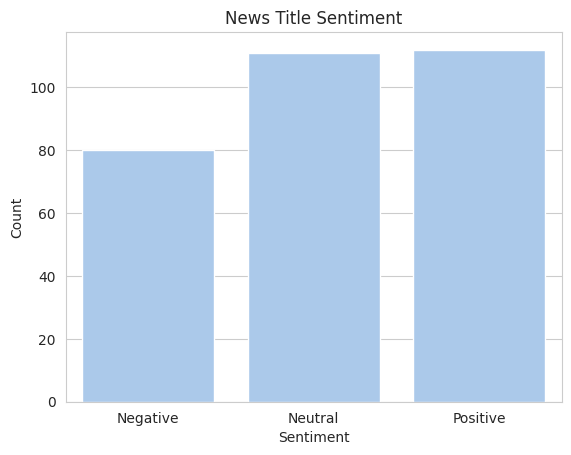

In [ ]:
# Graph the sentiment result
sns.countplot(x = 'sentiment', data = news_result)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('News Title Sentiment')

### News Title Sentiment in User History

In [ ]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

# Apply sentiment analysis using a lexicon
sia = SentimentIntensityAnalyzer()
sent['sentiment_score'] = sent['tokenized'].apply(lambda tokens: sia.polarity_scores(' '.join(tokens))['compound'])

# Classify sentiment based on the sentiment score
sent['sentiment'] = sent['sentiment_score'].apply(lambda score: 'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral'))

# Create the result dataframe
sent_result = sent[['Title', 'sentiment_score', 'sentiment']]
sent_result

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Title,sentiment_score,sentiment
629,6 Silent Symptoms of Colon Cancer You Might Be...,-0.7650,Negative
499,"1 Family's Adoption Photo Shoot Is on Point, b...",-0.3400,Negative
135,Why Americans Use Fahrenheit Instead of Celsius,0.0000,Neutral
480,Cause determined in Jessi Combs' fatal speed r...,-0.5859,Negative
90,"Eric Tse, 24, just became a billionaire overnight",0.0000,Neutral
456,This is the average Social Security check in e...,0.3400,Positive
304,Lori Loughlin Is 'Absolutely Terrified' After ...,-0.6478,Negative


Visualize the count of each sentiment in our sample.

Text(0.5, 1.0, 'News Title Sentiment')

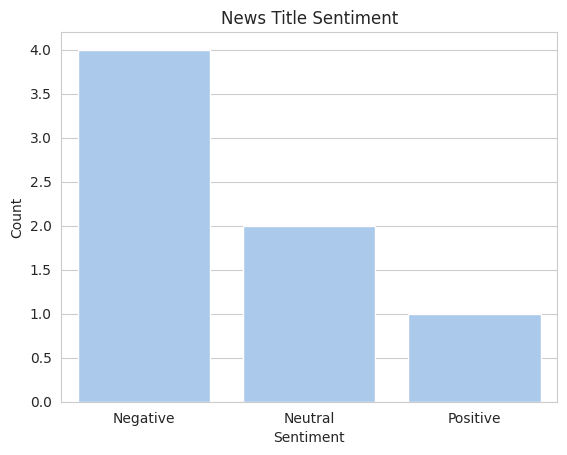

In [ ]:
# Graph the sentiment result
sns.countplot(x = 'sentiment', data = sent_result)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('News Title Sentiment')

From the result we can see that in our sample, most of the news titles the users read are considered negative, aligning with the previous result. However, the result from the news dataset tells us that most of the news published (nearly half of the sample)have neutral titles. Therefore, we may find that people tend to click news with more negative titles.

In [ ]:
train_b_df.columns

Index(['ImpressionId', 'UserId', 'Time', 'History', 'Impressions'], dtype='object')

In [ ]:
train_n_df.columns

Index(['NewsId', 'Category', 'SubCat', 'Title', 'Abstract', 'TitleEnt',
       'AbstractEnt'],
      dtype='object')

In [ ]:
test_b_df.columns

Index(['ImpressionId', 'UserId', 'Time', 'History', 'Impressions'], dtype='object')

In [ ]:
test_n_df.columns

Index(['NewsId', 'Category', 'SubCat', 'Title', 'Abstract', 'TitleEnt',
       'AbstractEnt', 'Labels'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
import numpy as np

# Load data
# user_behavior_df = pd.read_csv('/content/behaviors.tsv')
# news_df = pd.read_csv('/content/news.tsv', delimiter='\t', on_bad_lines='skip')

# Data preprocessing example
# Assuming `Impressions` contains news article IDs
# news_ids = train_n_df['NewsId'].unique()
# train_b_df['Impressions'] = train_b_df['Impressions'].apply(lambda x: [int(id) for id in x.split() if int(id) in news_ids])

# # Flatten the `Impressions` list for simplicity in this example
# train_b_df['Impressions'] = train_b_df['Impressions'].apply(lambda x: np.mean(x))
train_n_df = train_n_df.dropna()

# # Feature extraction
tfidf = TfidfVectorizer()

X = tfidf.fit_transform(train_n_df['Abstract'])
y = train_n_df['Category']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(kernel='linear', random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': MultinomialNB()
}

# Train and evaluate models
for model_name, model in models.items():
    print(f"\nTraining and evaluating {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print results
    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")




Training and evaluating Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Metrics:
Accuracy: 0.6452

Training and evaluating Random Forest...
Random Forest Metrics:
Accuracy: 0.5842

Training and evaluating Support Vector Machine...
Support Vector Machine Metrics:
Accuracy: 0.6721

Training and evaluating K-Nearest Neighbors...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K-Nearest Neighbors Metrics:
Accuracy: 0.2704

Training and evaluating Naive Bayes...
Naive Bayes Metrics:
Accuracy: 0.5238
